The Jupyter Notebook will provide a brief introduction to the **plot** script, which is mostly a collection of plotting functions.

- **data_distribution**: Draw bar charts and box charts to show distribution of data.
- **plot_slab**：Draw a diagram of a single VASP structure
- **plot_configration**：Draw diagrams of multiple VASP structures at once
- **energy_diagram**：Draw the energy profile
- **gradient_graphics**：Use matplotlib for gradient padding

In [1]:
from Jworkflow.plot import plot_slab, plot_configration, energy_diagram, gradient_graphics, data_distribution

from pymatgen.core import Structure
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# data_distribution
Using bar charts and box charts to show distribution of data. Enter a list of data and specify the number of bins for the bar chart. Here we show it with a set of random numbers.

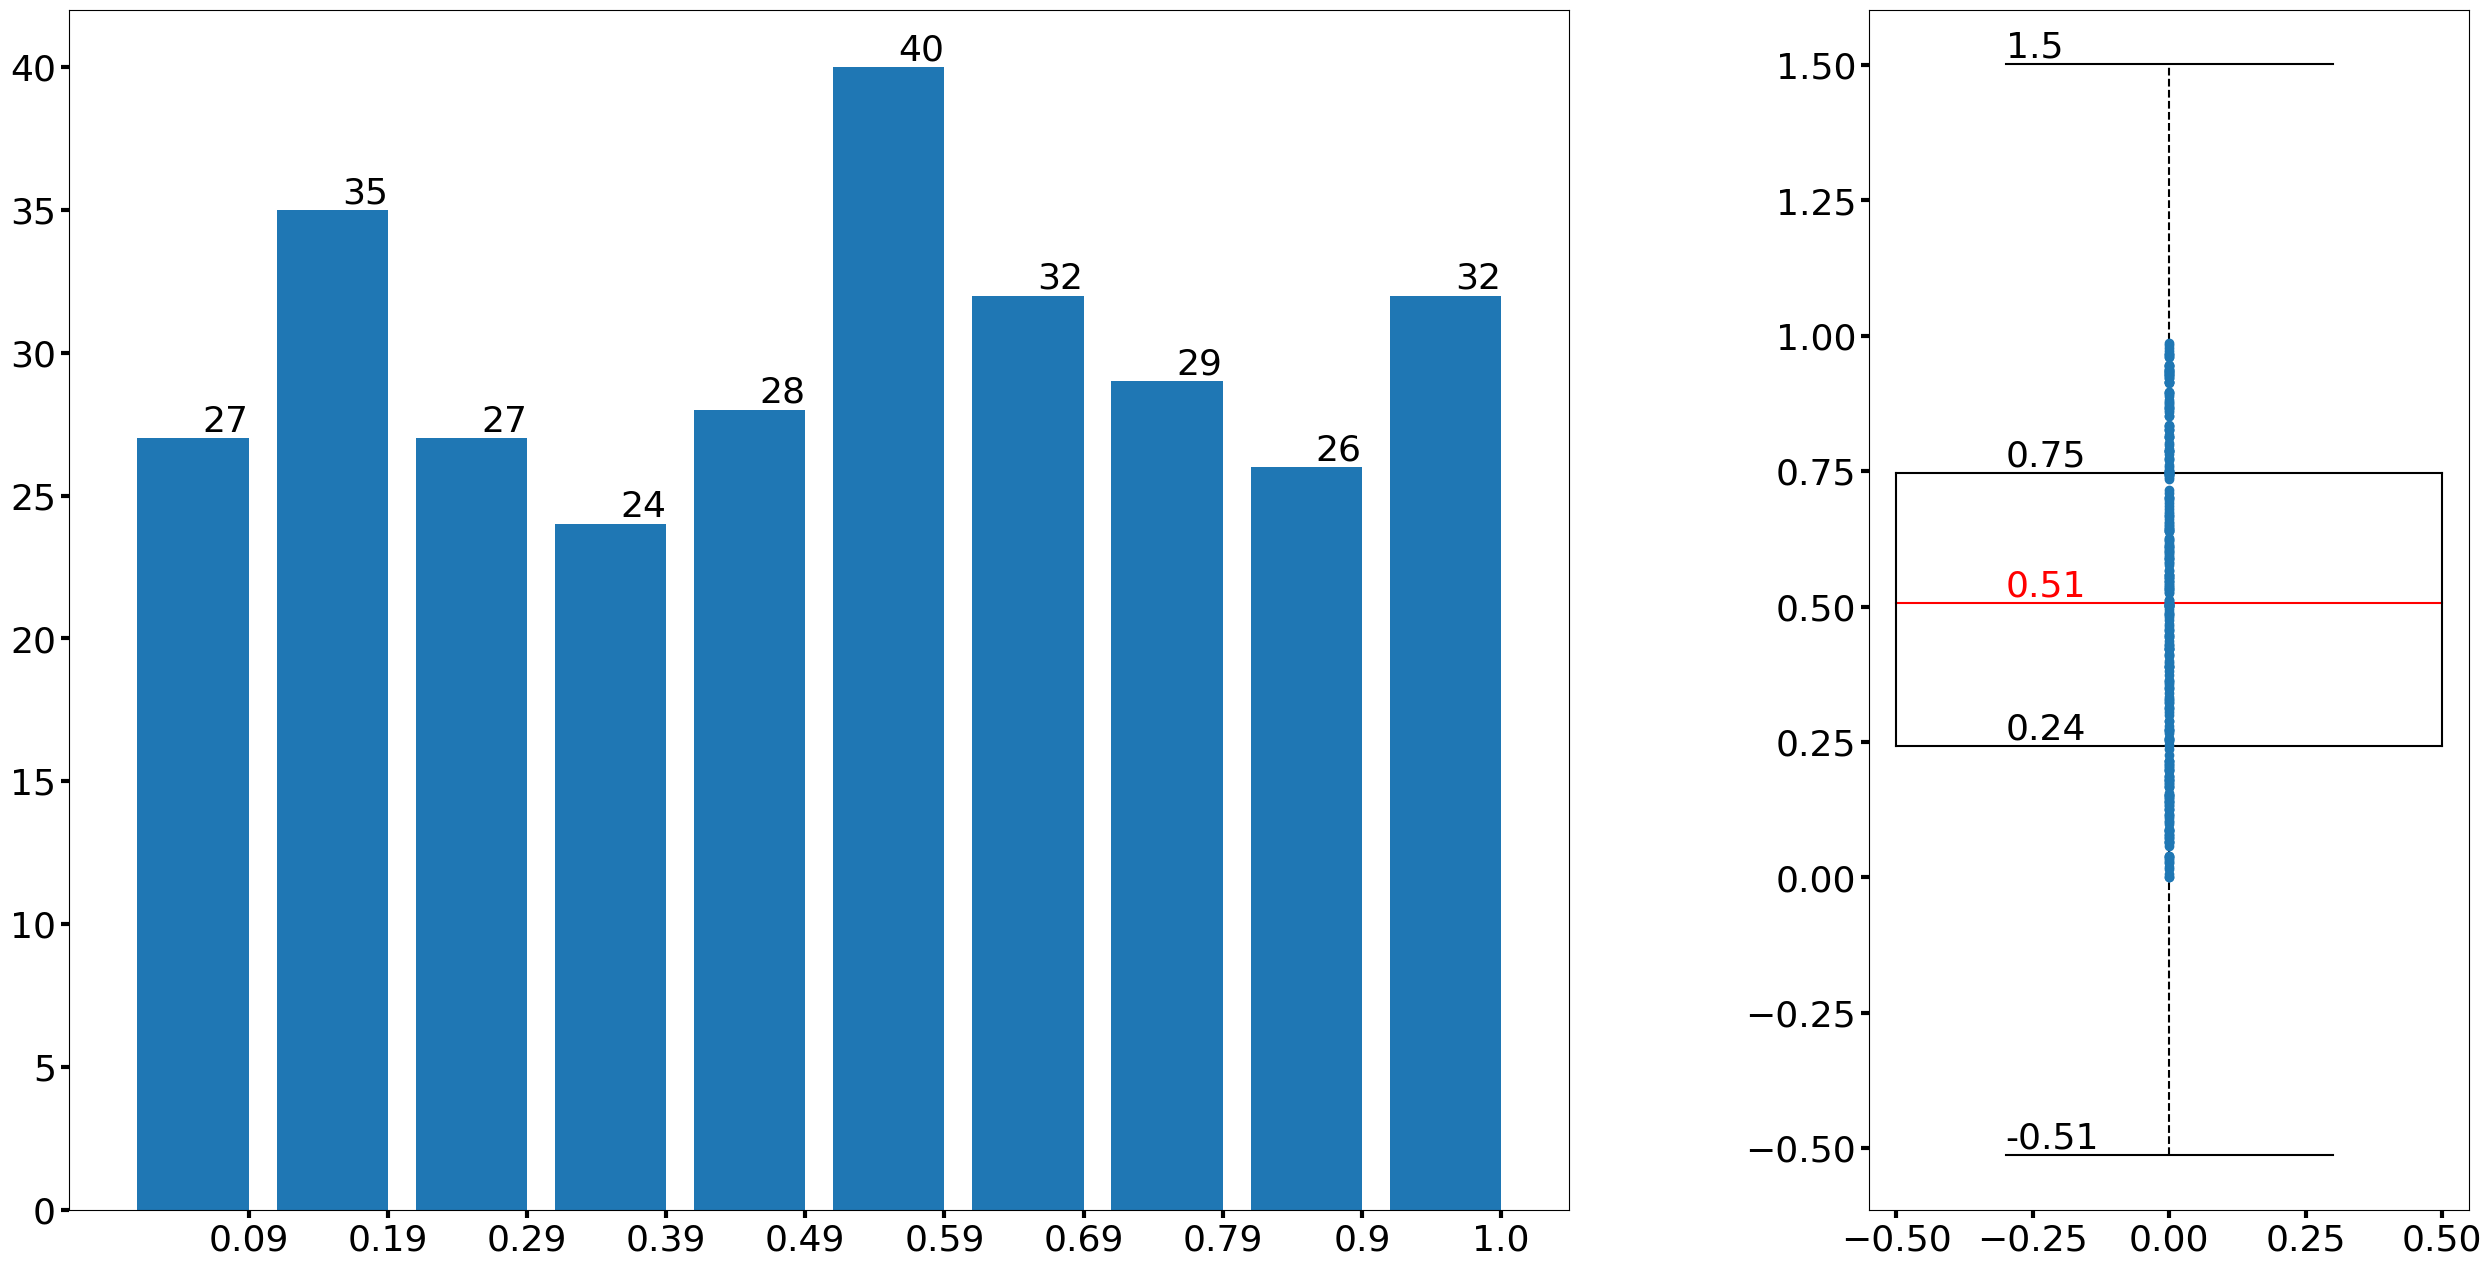

In [6]:
data_distribution(data_list=np.random.rand(300), bar_number=10)

# plot_slab
This function draws the structure of a slab according to the plot_slab function in pymatgen

## Key parameters
- **ax**：matplotlib axes object
- **slab**：slab structure file with VASP format
- **axis_extend**：The scaling coefficient of the lattice. When drawing, the scaled lattice will be used to fill the axes as much as possible. The larger the coefficient is, the smaller the slab will be.
- **decay**：The degree to which atomic color decays with decreasing z coordinates
- **max_z_cart**：The starting Z-axis coordinates of atomic color decay. It can be set to the Z-axis coordinates of the atoms on the slab surface for better coloring.
- **atom_edge_pare**：Color and width of atomic edges
- **cell_edge_para**：Color, line type, width and transparency of lattice edge
- **color_dict**：Colors for each element, use None to use the default value on pymatgen
- **radius_dict**：Raduis for each element, use None to use the default value on pymatgen  

The color Settings can be referred to [matplotlib-color](./files/matplotlib-color.png)  

## Example
First, we need to import the **Structure** class from pymatgen to read POSCAR structure

In [2]:
s = Structure.from_file('example/plot/adss/Ag2CuAl_NH2_45_1b.vasp')

Then use **matplotlib** to create a new **figure**, and then create or specify a **axes** and leave its axes undisplayed.

Finally, the **axes** and structure (**s**) of the painting object are passed into the **plot_slab** function to complete the drawing.

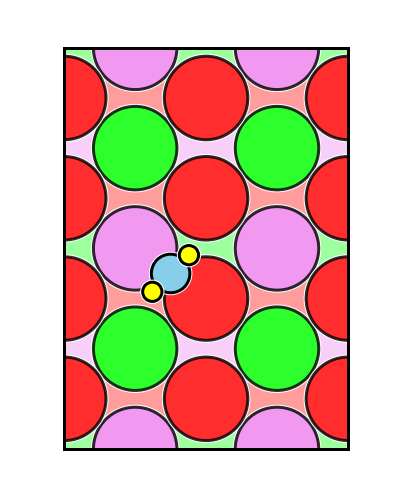

In [3]:
figure = plt.figure(figsize=(2.4 / 2.54, 3 / 2.54), dpi=360)
axes = figure.add_axes([0.0, 0.0, 1, 1])
axes.axis('off')

plot_slab(ax=axes,
          slab=s,
          axis_extend=1.06,
          decay=0.2,
          max_z_cart=15,
          atom_edge_para=['k', 0.6],
          cell_edge_para=['k', '-', 0.6, 1],
          color_dict={'Ag': 'red', 'Cu': 'violet', 'Al': 'lime', 'N': 'skyblue', 'H': 'yellow'},
          radius_dict={'Ag': 1.3, 'Cu': 1.3, 'Al': 1.3, 'N': 0.6, 'H': 0.3},
         )

After that you can choose to save the picture

In [4]:
figure.savefig('example/plot/Ag2CuAl_NH2_45_1b.jpg', dpi=360)

# plot_configration
This function plots multiple slabs in a single plot according to the plot_slab function

## Key parameters
- **df**：The DataFrame that stores the name of slab files
- **plot_part**：The column or row name for the slab file name in the DataFrame
- **structure_path**：The path where the slab structure file is stored
- **plt_setting**：The width of the figure（in cm），the number of axes per row，the height to width ratio of the axes，the spacing between the top and bottom, the left and right of the axes (in cm)
- **titles**：The title of each axes
- **title_para**：The font size of the title and its spacing from the axis  
- other parameters in **plot_slab**

## Example
First, read or create a **DataFrame** that stores the slab structure file names. These DataFrame needs to put the names in the same column or row.

In [5]:
df = pd.read_excel('example/plot/adss.xlsx', index_col=0)
df

,0,1,2,3,4,5
adss,Ag2CuAl_NH2_45_1b,Ag2CuAl_NH2_45_1c,Ag2CuAl_NH2_45_1t,Ag2CuAl_NH2_-45_2b,Ag2CuAl_NH2_45_2c,Ag2CuAl_NH2_45_2t


Then you can directly call **plot_configration** to plot, passing the df and the folder path that stores the vasp structure file.

You need to adjust the **aspect ratio** of the axes according to the specific structure to get the best results. Using the **max_z_cart** parameter to uniformly set the starting height of the color decrement can also help you get better results

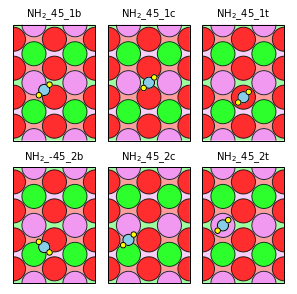

In [6]:
fig = plot_configration(df=df,
                 plot_part='adss',
                 structure_path='example/plot/Adss',
                 plt_setting=[10, 3, 1.3, 0.7, 0],
                 titles=['NH$_2$_45_1b', 'NH$_2$_45_1c', 'NH$_2$_45_1t', 'NH$_2$_-45_2b', 'NH$_2$_45_2c', 'NH$_2$_45_2t'],
                 title_para=[10, 0],
                 max_z_cart=15,
                 axis_extend=1.06,
                 atom_edge_para=['k', 1],
                 color_dict={'Ag': 'red', 'Cu': 'violet', 'Al': 'lime', 'N': 'skyblue', 'H': 'yellow'},
                 radius_dict={'Ag': 1.3, 'Cu': 1.3, 'Al': 1.3, 'N': 0.6, 'H': 0.3},)

After that you can choose to save the picture

In [7]:
fig.savefig('example/plot/Ag2CuAl_NH2.jpg', dpi=360)

# energy_diagram
This function can be used to plot the energy profile

## Key parameters
- **ax**：matplotlib Axes object
- **df**：DataFrame that stores slab names and energies
- **sys**：Select the substrate(system/slab) for which the energy profile needs to be drawn
- **path_steps**：Set the drawing order and connection relation of the energy diagram according to the reaction steps
- **xticks**：Manually set the label for the X-axis. They will be read from the table's row name by default
- **set_ylabel**：Add the Y-axis label and set its font size
- **set_legend**：Add the legend, including the name of the individual legend, the color, width, and type of lines
- **mark_PDS**：Mark PDS, set arrow color and text information. This requires the PDS information in the DataFrame
- **bar_elp**：To draw a transition state energy barrier using a curve

## Example1
Let us plot the change in the free energy of a reaction. First load the data of the free energy profile and add the energy corresponding to a reference state (0 eV) to it.

In [2]:
df = pd.read_excel('example/plot/path1.xlsx', index_col=0)
df['CH3OH(g)'] = 0
df

,CH3OH,CH3O,CH2O,CHO,HCOOH,HCOO,CO2,CO2(g),PDS,barrier,CH3OH(g)
MoN,-0.305977,-0.244667,0.102416,-1.437236,-0.217174,0.576065,-0.361606,-0.154615,CHO->HCOOH,1.220062,0
Ni3N,-0.951149,-1.932497,-0.544601,-0.739306,-1.235348,-1.851625,-1.205098,-0.154615,CH3O->CH2O,1.387896,0


Once the data is ready, you can start drawing by defining a figure and its axes and passing them into the **energy_diagram** along with the df you just imported.  

Since this function can only draw the free energy curve of one structure at a time, we draw it in two times, and add the coordinates and legends of the specified Y-axis on the second drawing.  

The key to using this function is the definition of the **path_steps** parameter：
1. First define a large list [ ] to represent the entire parameter
2. Then add a list of all the steps in an x coordinate, [ [ ],......] , [ ] indicates the step information at x=0
3. Add 1 or 2 lists to this list, representing the information about the steps and the lines between them and the steps at the previous x, [[[], []],......]
4. Add the name of the step and its color to the list of step information, here our first step is the reference state 'CH3OH(g)', we color it black, because it is the first step and there is no connection with the previous step, only one list is added, [ [('CH3OH(g)', 'k')], ]
5. Continue to edit the step information, the second step of the reaction is 'CH3OH', here we also need to define the link between this step and the previous step. Add a list representing the connection of the first step here,[[('CH3OH', c)], [ [] ]]. Then add the index of the previous step to be connected and the color of the connection in the added list,[[('CH3OH', c)], [[(0, c)]]]

To identify the PDS by **mark_PDS**, first giving the color of the arrows, noting that these PDS must use "->" to connect the two connected steps. The next tuple is to show barrier in the diagram, give x and y offset from the center of the arrow, text color and fontsize in the tuple.

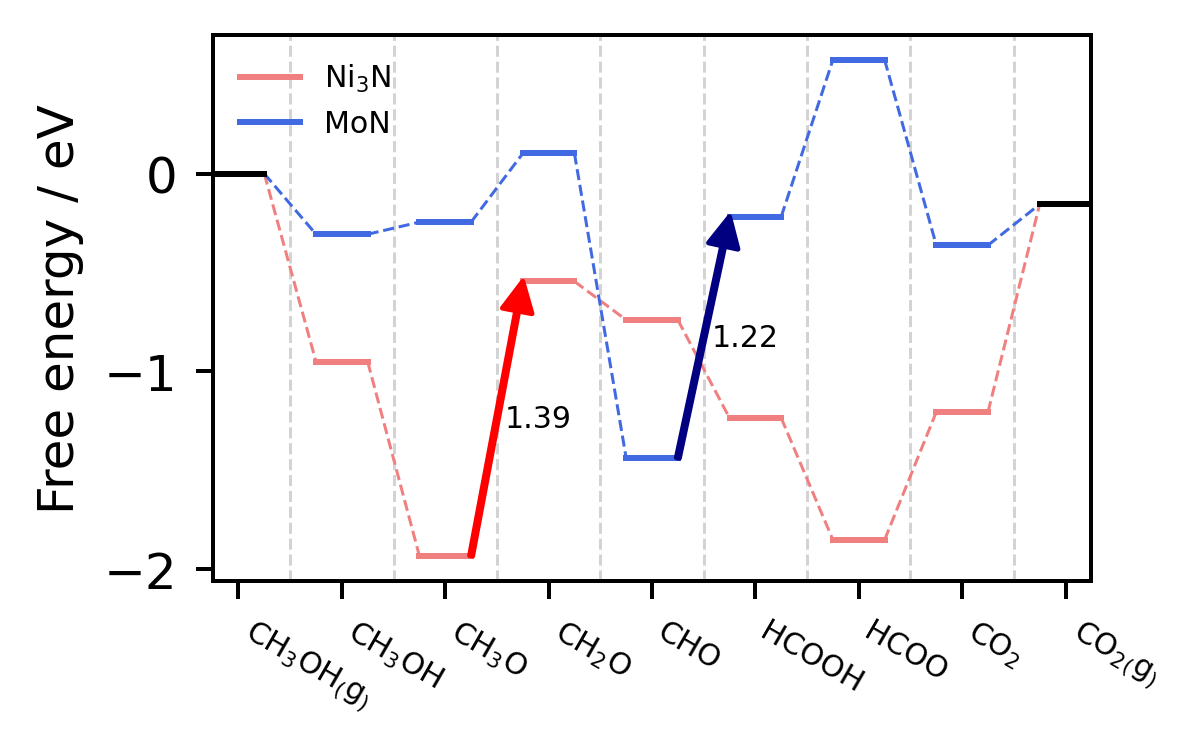

In [5]:
fig = plt.figure(figsize=(8 / 2.54, 5 / 2.54), dpi=360)
ax = fig.add_subplot(1, 1, 1)

c = 'lightcoral'
energy_diagram(ax,df, 'Ni3N',
              [
                  [[('CH3OH(g)', 'k')]],
                  [[('CH3OH', c)], [[(0, c)]]],
                  [[('CH3O', c)], [[(0, c)]]],
                  [[('CH2O', c)], [[(0, c)]]],
                  [[('CHO', c)], [[(0, c)]]],
                  [[('HCOOH', c)], [[(0, c)]]],
                  [[('HCOO', c)], [[(0, c)]]],
                  [[('CO2', c)], [[(0, c)]]],
                  [[('CO2(g)', 'k')], [[(0, c)]]],
              ],
              mark_PDS=[('PDS', 'r', (0.8, 0, 'k', 6))],
              )

c = 'royalblue'
energy_diagram(ax, df, 'MoN',
              [
                  [[('CH3OH(g)', 'k')]],
                  [[('CH3OH', c)], [[(0, c)]]],
                  [[('CH3O', c)], [[(0, c)]]],
                  [[('CH2O', c)], [[(0, c)]]],
                  [[('CHO', c)], [[(0, c)]]],
                  [[('HCOOH', c)], [[(0, c)]]],
                  [[('HCOO', c)], [[(0, c)]]],
                  [[('CO2', c)], [[(0, c)]]],
                  [[('CO2(g)', 'k')], [[(0, c)]]],
              ],
              mark_PDS=[('PDS', 'navy', (0.8, 0, 'k', 6))],
              set_ylabel=['Free energy / eV', 10],
              set_legend=[
                  [['Ni$_3$N', 'lightcoral', 1.2, '-'],
                  ['MoN', 'royalblue', 1.2, '-']],
                  6, 0],
              show_space_line=True)

## Exmaple2
Through multiple ellipse drawing energy diagram including transition state energy barrier.（For rough drawing purposes only, a more accurate drawing should be made using the **spline.dat** file obtained by running the **nebresults.pl** script）  

Also first import df with energy profile data and add an initial state  

This data includes the decomposition of nitrogen into two nitrogen atoms on two different systems.


In [10]:
df = pd.read_excel('example/plot/path2.xlsx', index_col=0)
df['N2(g)'] = 0
df

,*N2,TS,*N+*N,N2(g)
A,-1.211625,1.673587,-0.959406,0
B,-1.331049,0.736754,-1.868877,0


The **bar_elp** parameter is used here to draw the transition state energy barrier through a set of ellipses. The whole parameter is a list, which can contain multiple lists representing different curves. These lists need to be filled with 3 or 4 tuples to draw the curve. The meanings of these tuples are as follows:

1. The initiation, middle and end steps of curve plotting, these steps need to be connected
2. Control the shape of the curve, which consists of three ellipses. The first number controls the slope of the tangents of the two connecting points; The second and third numbers respectively control half of the total height and length of the remaining portion of the middle ellipse after drawing.
3. Curve width, color and line type
4. Mark the specific energy barrier value, You need to give the amount by which the font deviates from the vertex of the curve at x and y, and the color and size of the font, which can be omitted if not marked.

'none' is used to indicate no color, to eliminate unnecessary lines and steps. These steps are hidden but still need to be defined.

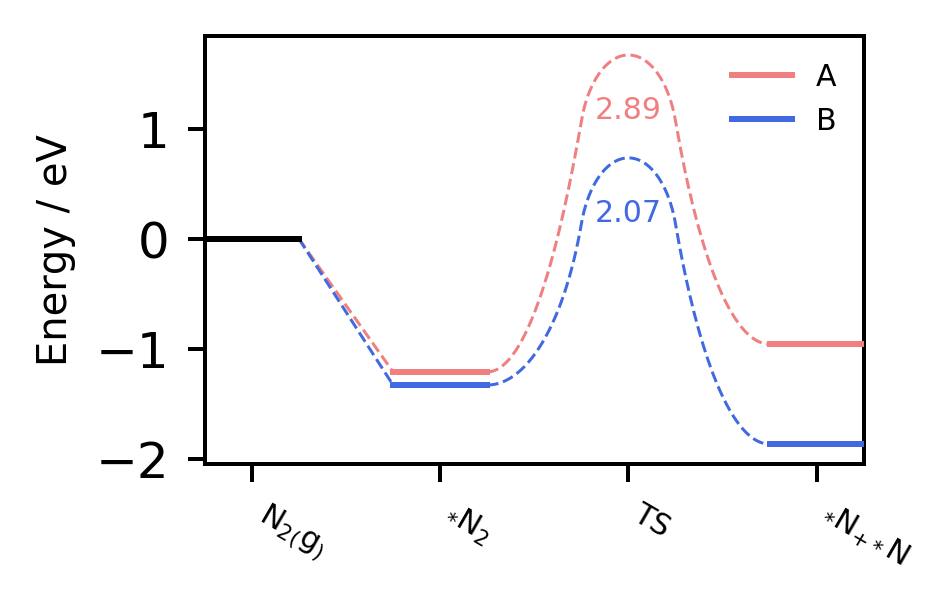

In [11]:
fig = plt.figure(figsize=(6 / 2.54,4 / 2.54), dpi=360)
ax = fig.add_subplot(1, 1, 1)

n = 'none'
c = 'lightcoral'
energy_diagram(ax,df, 'A',
              [
                  [[('N2(g)', 'k')]],
                  [[('*N2', c)], [[(0, c)]]],
                  [[('TS', n)], [[(0, n)]]],
                  [[('*N+*N', c)], [[(0, n)]]]
              ],
              bar_elp=[[('*N2', 'TS', '*N+*N'), (5, 0.6, 0.5), (0.6, c, '--'), (0, -0.5, c, 6)]],
              )

c = 'royalblue'
energy_diagram(ax, df, 'B',
              [
                  [[('N2(g)', 'k')]],
                  [[('*N2', c)], [[(0, c)]]],
                  [[('TS', n)], [[(0, n)]]],
                  [[('*N+*N', c)], [[(0, n)]]],
              ],
              bar_elp=[[('*N2', 'TS', '*N+*N'), (5, 0.6, 0.5), (0.6, c, '--'), (0, -0.5, c, 6)]],
              set_ylabel=['Energy / eV', 8],
              set_legend=[
                  [['A', 'lightcoral', 1.2, '-'],
                  ['B', 'royalblue', 1.2, '-']],
                  6, 0])

# gradient_graphics
This function uses **matplotlib** to implement color gradients

## Key parameters
- **axes**：Matplotlib object Axes for plotting
- **x**：x coordinates of the patch
- **y**：y coordinates of the patch
- **colormap**：Gradient colors, either defined in matplotlib or customized with a dictionary
- **color_matrix**：The gradient matrix, which is a two-dimensional matrix, has values between 0 and 1
- **edge_para**：The color and width of the patch edge

The program will first create a square area that can cover the specified patch, and then subdivide the square area into different subareas according to the size of **color_matrix**. Each subarea will get a color according to its value and **colormap**, and then the color between each subarea will get a gradual transition through the form of gradient filling.

The default gradient colors in matplotlib are:
- [Perceptually Uniform Sequential colormaps](./files/Perceptually-Uniform-Sequential-colormaps.jpg)
- [Sequential colormaps](./files/Sequential-colormaps.jpg)
- [Sequential (2) colormaps](./files/Sequential-(2)-colormaps.jpg)
- [Cyclic colormaps](./files/Cyclic-colormaps.jpg)
- [Diverging colormaps](./files/Diverging-colormaps.jpg)
- [Qualitative colormaps](./files/Qualitative-colormaps.jpg)
- [Miscellaneous colormaps](./files/Miscellaneous-colormaps.jpg)

## Example
We define a rectangle and fill it with gradient colors. **color_matrix** is a 2X7 matrix equivalent to dividing a square area into 14 small squares and filling colors in them.

In the viridis colormap, 1 corresponds to yellow-green, 0 corresponds to blue-purple, notice that the first row of the matrix corresponds to the bottom row of the grid matrix in the figure.

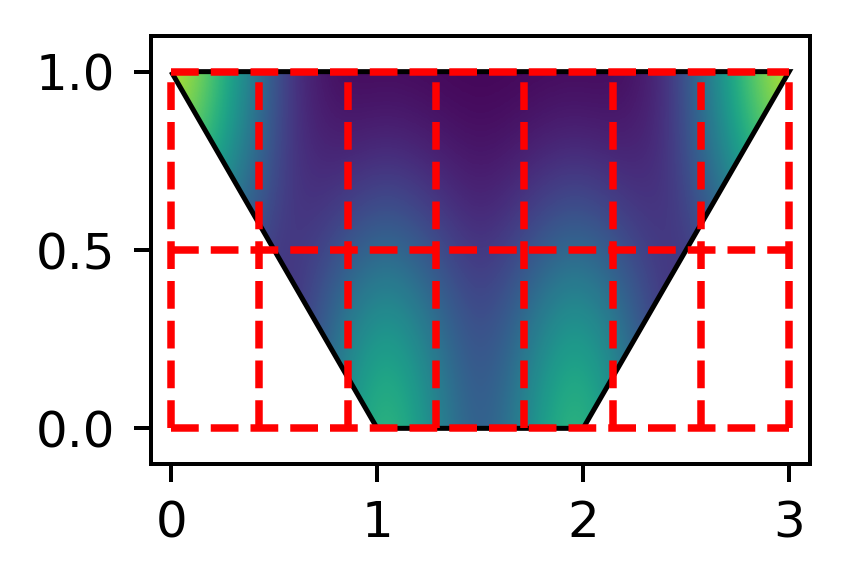

In [12]:
fig = plt.figure(figsize=(6 / 2.54, 4 / 2.54), dpi=360)
ax = fig.add_subplot(1, 1, 1)

gradient_graphics(ax,
                 x=[0, 3, 2, 1, 0],
                 y=[1, 1, 0, 0, 1],
                 colormap='viridis',
                 color_matrix=[[0, 0, 1, 0, 1, 0, 0],
                               [1, 0, 0, 0, 0, 0, 1]],
                 zorder=0)

ax.plot([0, 3], [1, 1], c='r', ls='--')
ax.plot([0, 3], [0.5, 0.5], c='r', ls='--')
ax.plot([0, 3], [0, 0], c='r', ls='--')
for i in range(8):
    ax.plot([3/7*i] * 2, [0, 1], c='r', ls='--')

You can also customize **colormap**.

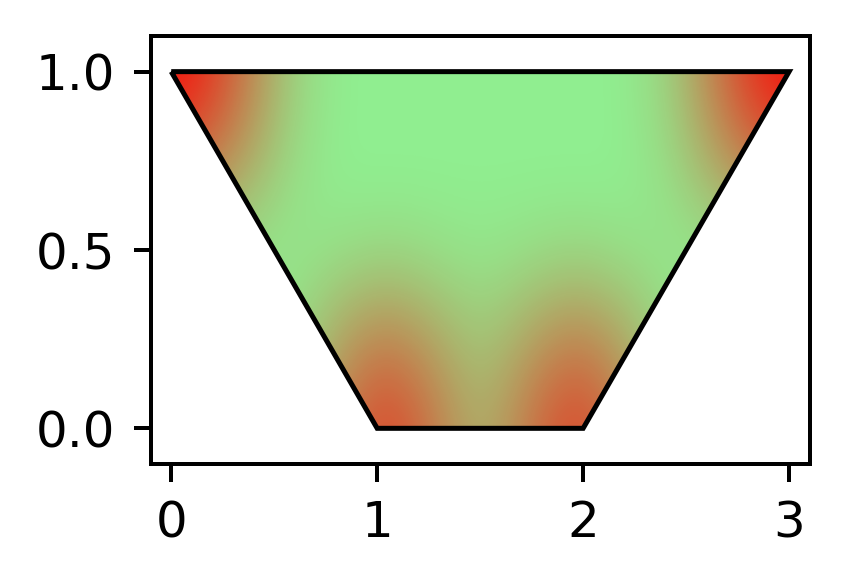

In [13]:
fig = plt.figure(figsize=(6 / 2.54, 4 / 2.54), dpi=360)
ax = fig.add_subplot(1, 1, 1)

gradient_graphics(ax,
                 x=[0, 3, 2, 1, 0],
                 y=[1, 1, 0, 0, 1],
                 colormap=[(0,'lightgreen'),(1,'r')],
                 color_matrix=[[0, 0, 1, 0, 1, 0, 0],
                               [0, 0, 0, 0, 0, 0, 0],
                               [1, 0, 0, 0, 0, 0, 1]],
                 )